# 맷플롯립으로 그래프 그리기

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/hg-da/blob/main/05-1.ipynb"><img src="https://jupyter.org/assets/share.png" width="61" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/blob/main/05-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

## 시작하기 전에

In [3]:
import gdown

gdown.download('https://bit.ly/nsbook7', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/nsbook7
To: /home/studio-lab-user/hg-da/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 91.6MB/s]


'ns_book7.csv'

In [3]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


## 맷플롯립의 그래프 구조

### 그래프 크기 변경하기

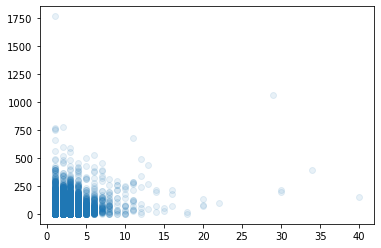

In [4]:
import matplotlib.pyplot as plt

plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

In [5]:
print(plt.rcParams["figure.figsize"])

[6.0, 4.0]


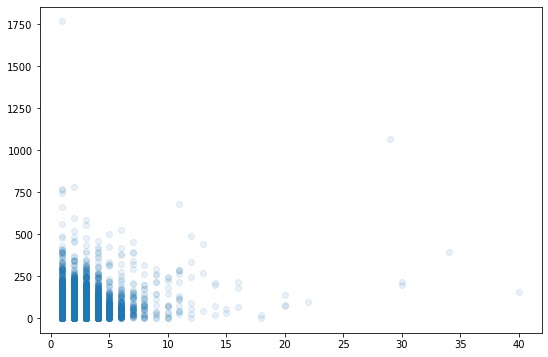

In [6]:
plt.figure(figsize=(9, 6))
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

In [7]:
print(plt.rcParams["figure.dpi"])

72.0


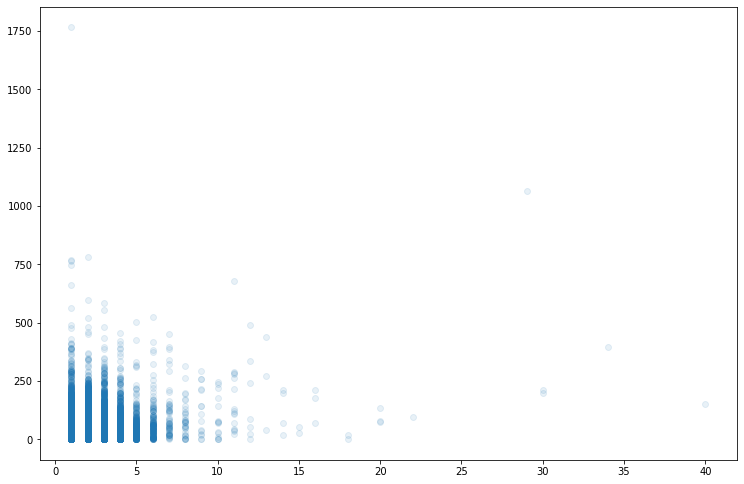

In [8]:
fig = plt.figure(figsize=(900/72, 600/72))
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

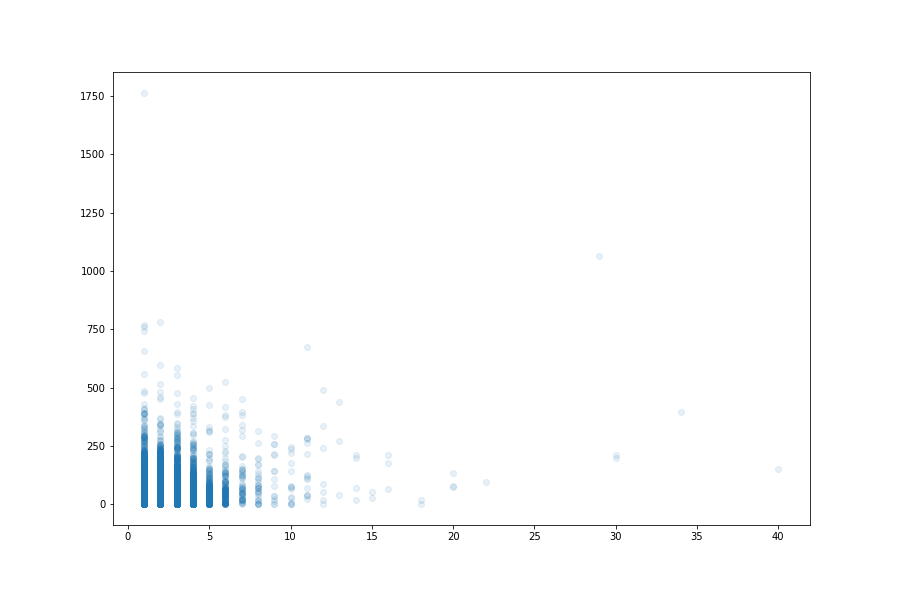

In [9]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
fig = plt.figure(figsize=(900/72, 600/72))
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

In [10]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}

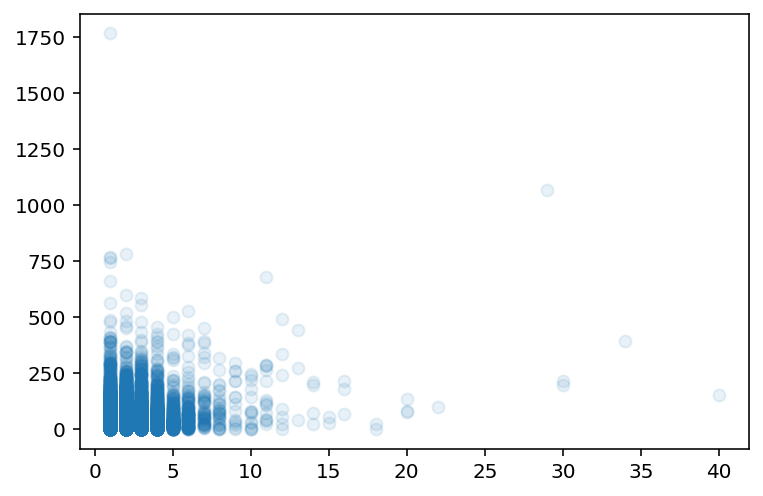

In [11]:
fig = plt.figure(dpi=144)
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

### rcParams로 기본값 바꾸기

In [12]:
plt.rcParams["figure.dpi"] = 100

In [13]:
plt.rcParams['scatter.marker']

'o'

In [14]:
plt.rcParams['scatter.marker'] = '*'

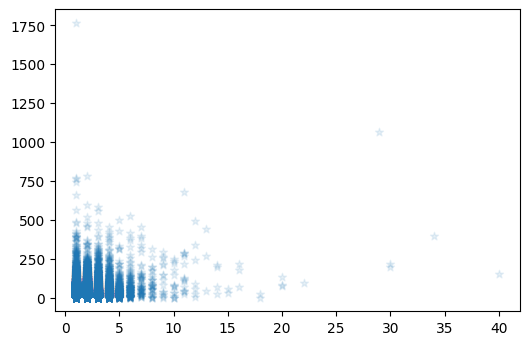

In [15]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

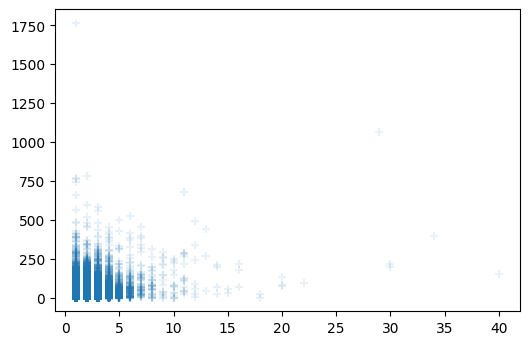

In [16]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1, marker='+')
plt.show()

### 그래프 구성 요소

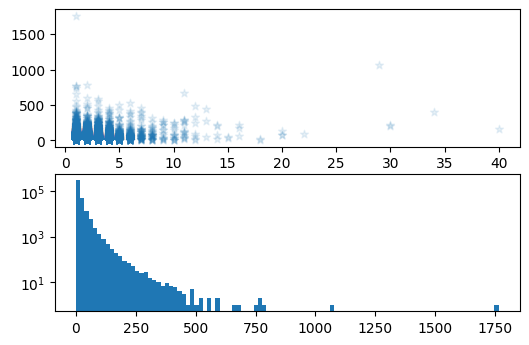

In [17]:
fig, axs = plt.subplots(2)

axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)

axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_yscale('log')

plt.show()

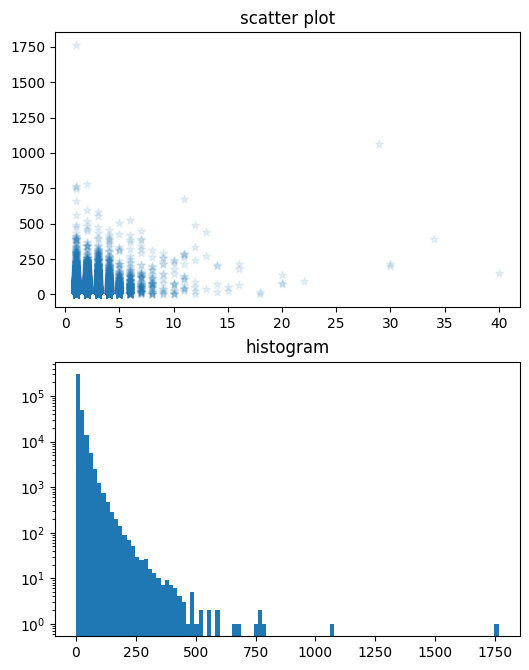

In [18]:
fig, axs = plt.subplots(2, figsize=(6, 8))

axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
axs[0].set_title('scatter plot')

axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_title('histogram')
axs[1].set_yscale('log')

plt.show()

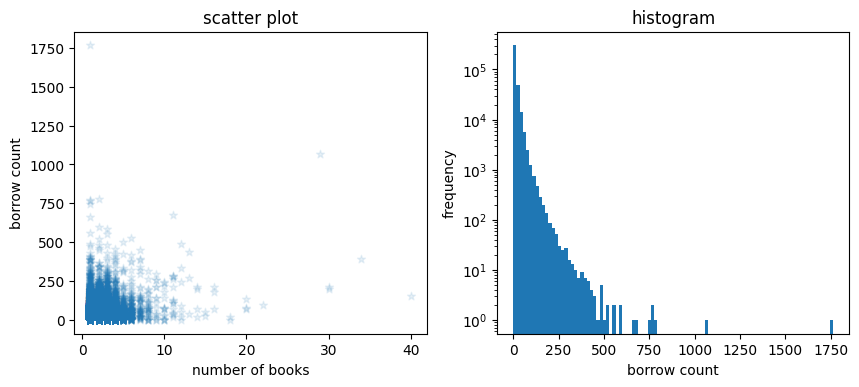

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
axs[0].set_title('scatter plot')
axs[0].set_xlabel('number of books')
axs[0].set_ylabel('borrow count')

axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_title('histogram')
axs[1].set_yscale('log')
axs[1].set_xlabel('borrow count')
axs[1].set_ylabel('frequency')

plt.show()

## 선 그래프 그리기

### 년도별 출간 도서 개수 구하기

In [20]:
count_by_year = ns_book7['발행년도'].value_counts()
count_by_year

2012    18601
2014    17797
2009    17611
2011    17523
2010    17503
        ...  
2650        1
2108        1
2104        1
2560        1
1947        1
Name: 발행년도, Length: 87, dtype: int64

In [21]:
count_by_year = count_by_year.sort_index()
count_by_year

1947     1
1948     1
1949     1
1952    11
1954     1
        ..
2551     1
2552     2
2559     1
2560     1
2650     1
Name: 발행년도, Length: 87, dtype: int64

In [22]:
count_by_year = count_by_year[count_by_year.index <= 2030]
count_by_year

1947        1
1948        1
1949        1
1952       11
1954        1
        ...  
2020    11834
2021     1255
2025        1
2028        1
2030        1
Name: 발행년도, Length: 68, dtype: int64

In [49]:
import numpy as np

count_by_subject = ns_book7['주제분류번호'].apply(
    lambda no: '-1' if no is np.nan else no[:1]).value_counts()
count_by_subject

8     108643
3      80767
5      40916
9      26375
6      25070
1      22647
-1     16978
7      15836
4      13688
2      13474
0      12376
Name: 주제분류번호, dtype: int64

### 선 그래프

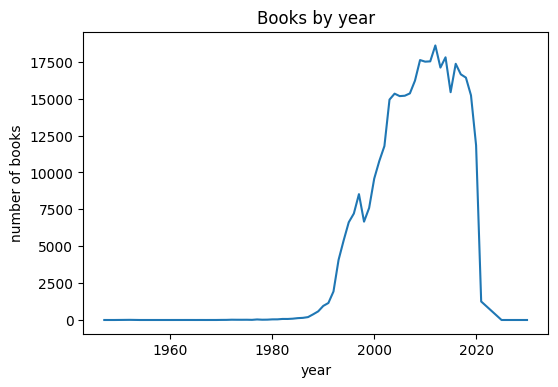

In [24]:
plt.plot(count_by_year.index, count_by_year.values)
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

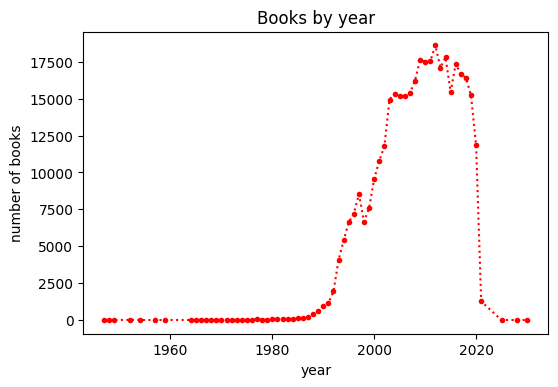

In [25]:
plt.plot(count_by_year, marker='.', linestyle=':', color='red')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

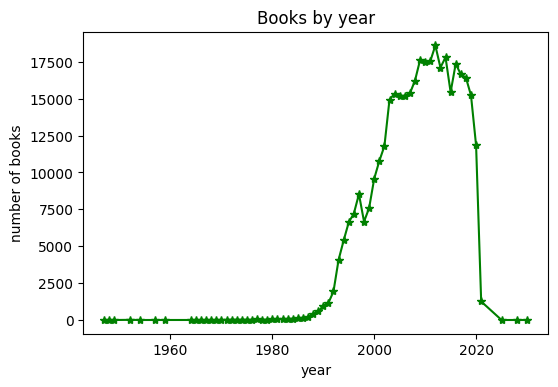

In [26]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

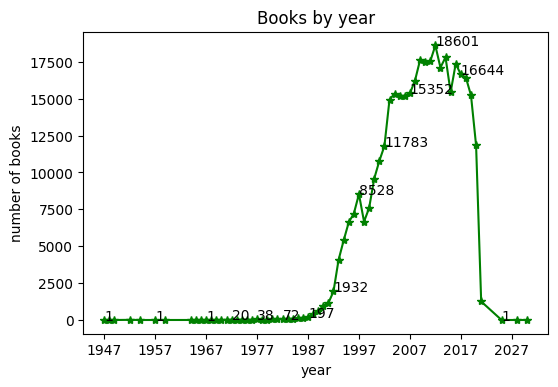

In [27]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val))
plt.show()

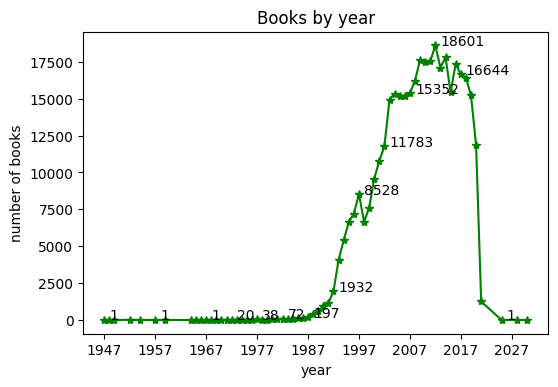

In [36]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val), xytext=(idx+1, val+10))
plt.show()

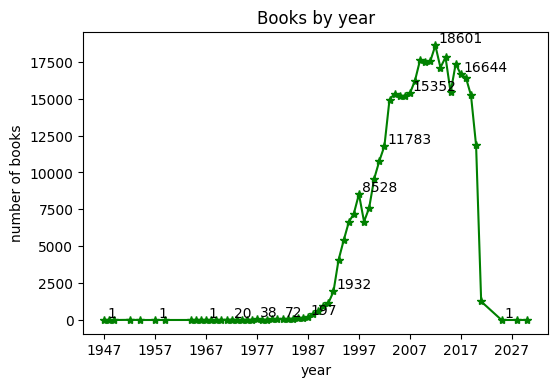

In [38]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val), xytext=(2, 2), textcoords="offset points")
plt.show()

## 막대 그래프 그리기

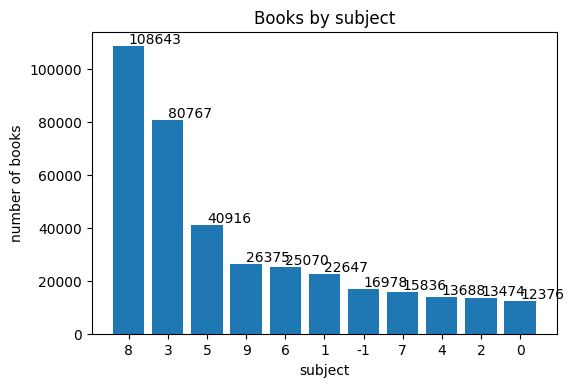

In [115]:
plt.bar(count_by_subject.index, count_by_subject.values)
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords="offset points")
plt.show()

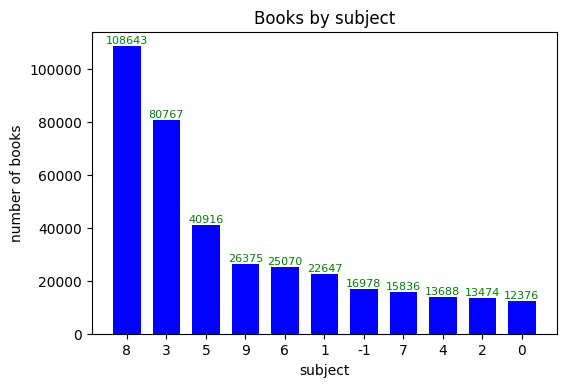

In [114]:
plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords="offset points", 
                 fontsize=8, ha="center", color='green')
plt.show()

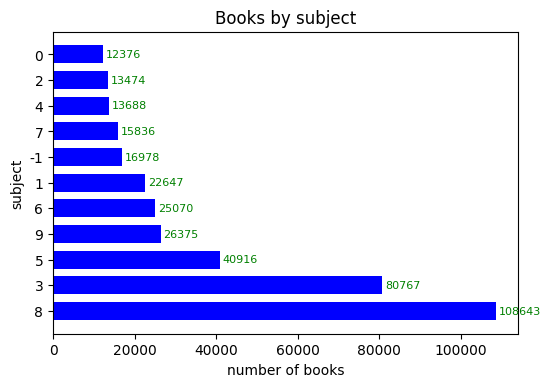

In [113]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
    plt.annotate(val, (val, idx), xytext=(2, 0), textcoords="offset points", 
                 fontsize=8, va="center", color='green')
plt.show()